<a href="https://colab.research.google.com/github/harini1411/harini1411/blob/main/PRODIGY_DS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

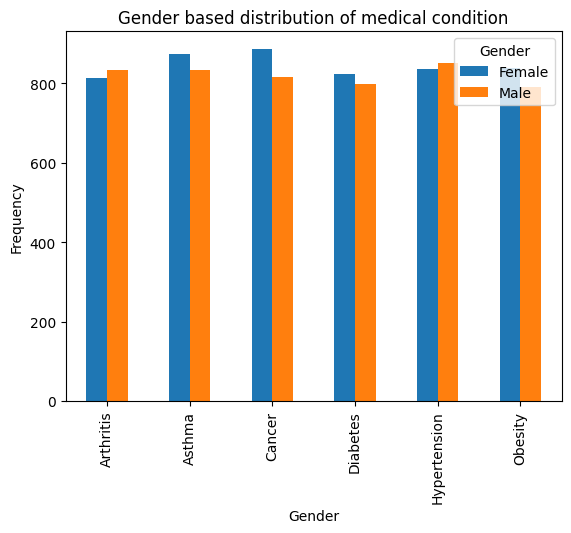

In [ ]:
#### usiong US health care dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('healthcare_dataset.csv')

print(data.info())

print(data.describe())

for date in ['Date of Admission','Discharge Date']:
    data[date] = pd.to_datetime(data[date])

data['Days Hospitalized'] = (data['Discharge Date'] - data['Date of Admission']).dt.days
data['Days Hospitalized'] = data['Days Hospitalized'].astype(int)


gender_medical = data.groupby(['Medical Condition','Gender']).size().sort_values().unstack()

gender_medical.plot(kind = 'bar')
mp.title('Gender based distribution of medical condition')
mp.xlabel('Gender')
mp.ylabel('Frequency')

mp.show()







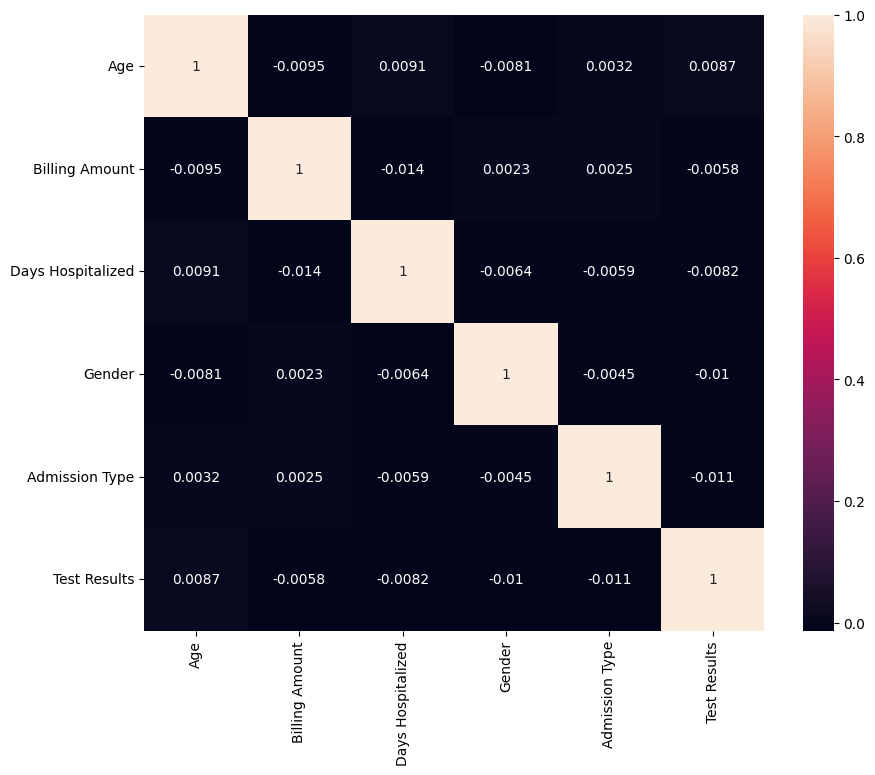

In [ ]:
correlation_columns = ['Age','Billing Amount','Days Hospitalized']

correlate_df = data[correlation_columns]

correlate_df['Gender'] = data['Gender'].astype('category').cat.codes
correlate_df['Admission Type'] = data['Admission Type'].astype('category').cat.codes
correlate_df['Test Results'] = data['Test Results'].astype('category').cat.codes

correlation_matrix = correlate_df.corr()

mp.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True)
mp.show()

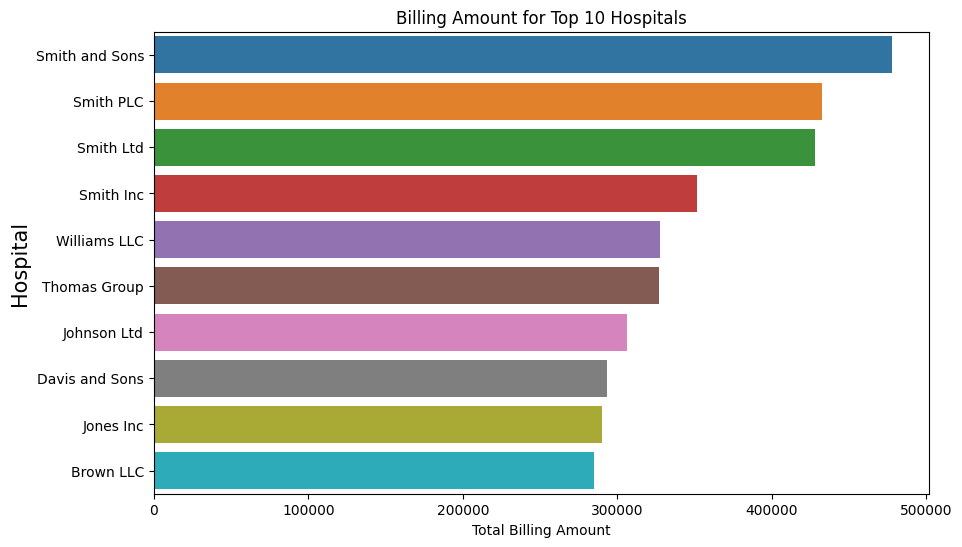

In [ ]:
top10_hospital_billing = data.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
mp.figure(figsize=(10,6))
sns.barplot(x= top10_hospital_billing['Billing Amount'],
            y= top10_hospital_billing['Hospital'],
            )

mp.xlabel('Total Billing Amount')
mp.ylabel('Hospital',fontsize = 15)

mp.title('Billing Amount for Top 10 Hospitals')
mp.show()

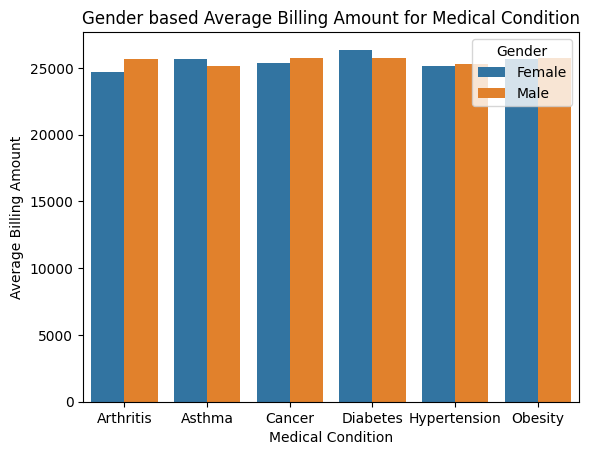

In [ ]:
medical_gender_billing = data.groupby(['Medical Condition','Gender'])[['Billing Amount']].mean().reset_index()

sns.barplot(x= medical_gender_billing['Medical Condition'],
            y= medical_gender_billing['Billing Amount'],
            hue = medical_gender_billing['Gender'])

mp.ylabel('Average Billing Amount')
mp.title('Gender based Average Billing Amount for Medical Condition')
mp.show()

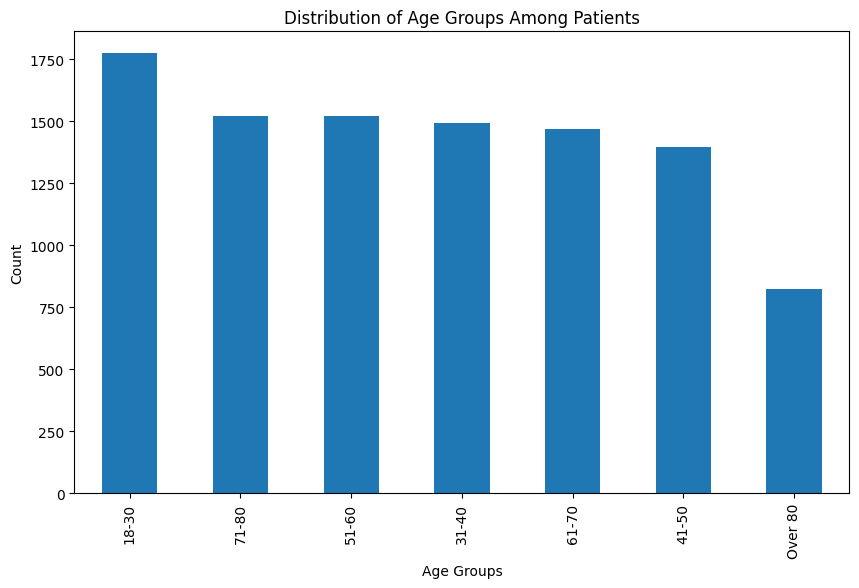

In [ ]:
data['Age_Group'] = pd.cut(data['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
                                labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = False)
Age_group = data['Age_Group'].value_counts().sort_values(ascending = False)

mp.figure(figsize=(10,6))
Age_group.plot(kind = 'bar')
mp.title('Distribution of Age Groups Among Patients')
mp.xlabel('Age Groups')
mp.ylabel('Count')
mp.show()